In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import numpy as np
# from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
import os 
from PIL import Image
import numpy as np

'''
HAppy=1
SAd=2
SUrprise=3
ANgry=4
DIsgust=5
FEar=6
NEutral=7

'''
labels=[]
dirname = '/content/drive/My Drive/jaffedbase'
final = []
counter=0
for fname in os.listdir(dirname):
    counter=counter+1
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)
    print(fname)
    if 'HA' in fname:
      labels.append(1)
    elif 'SA' in fname:
      labels.append(2)
    elif 'SU' in fname:
      labels.append(3)
    elif 'AN' in fname:
      labels.append(4)
    elif 'DI' in fname:
      labels.append(5)
    elif 'FE' in fname:
      labels.append(6)
    elif 'NE' in fname:
      labels.append(7)


final = np.asarray(final)
print(labels)
print(len(labels))
print(counter)
labels=np.asarray(labels)


YM.FE2.68.tiff
YM.FE3.69.tiff
YM.FE4.70.tiff
YM.HA1.52.tiff
YM.HA2.53.tiff
YM.HA3.54.tiff
YM.NE1.49.tiff
YM.NE2.50.tiff
YM.NE3.51.tiff
YM.SA1.55.tiff
YM.SA2.56.tiff
YM.SA3.57.tiff
YM.SU1.58.tiff
YM.SU2.59.tiff
YM.SU3.60.tiff
KR.AN1.83.tiff
KR.AN2.84.tiff
KR.AN3.85.tiff
KR.DI1.86.tiff
KR.DI2.87.tiff
KR.DI3.88.tiff
KR.FE1.89.tiff
KR.FE2.90.tiff
KR.FE3.91.tiff
KR.HA1.74.tiff
KR.HA2.75.tiff
KR.NE1.71.tiff
KR.NE2.72.tiff
KR.NE3.73.tiff
KR.SA1.77.tiff
KR.SA2.78.tiff
KR.SA3.79.tiff
KR.SU1.80.tiff
KR.SU2.81.tiff
KR.SU3.82.tiff
MK.AN1.125.tiff
MK.AN2.126.tiff
MK.AN3.127.tiff
MK.DI1.128.tiff
MK.DI2.129.tiff
MK.DI3.130.tiff
MK.FE1.131.tiff
MK.FE2.132.tiff
MK.FE3.133.tiff
MK.HA1.116.tiff
MK.HA2.117.tiff
MK.HA3.118.tiff
MK.NE1.113.tiff
MK.NE2.114.tiff
MK.NE3.115.tiff
MK.SA1.119.tiff
MK.SA2.120.tiff
MK.SA3.121.tiff
MK.SU1.122.tiff
MK.SU2.123.tiff
MK.SU3.124.tiff
NA.AN1.211.tiff
NA.AN2.212.tiff
NA.AN3.213.tiff
NA.DI1.214.tiff
NA.DI2.215.tiff
NA.DI3.216.tiff
NA.FE1.217.tiff
NA.FE2.218.tiff
NA.FE3.219.

## **preprocessing**

(213, 256, 256)


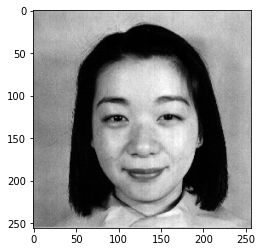

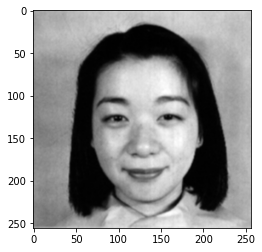

In [ ]:
print(final.shape)

a = np.array(final[3,:,:])
# a = np.expand_dims(a, axis=0)  # or axis=1
plt.imshow(a,cmap='gray')
# plt.show()
plt.show()

blur = cv2.GaussianBlur(a,(3,3),0)
plt.imshow(blur,cmap='gray')
# plt.show()
plt.show()

### **preprocessing & detecting face**

In [3]:
face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/haarcascade_frontalface_default.xml")

for i in range(counter):

  blur = cv2.GaussianBlur(final[i,:,:],(3,3),0)
  faces= face_cascade.detectMultiScale (blur, 1.1, 10)
  # Drawing rectangle around the face
  for(x , y,  w,  h) in faces:
    cv2.rectangle(blur, (x,y) ,(x+w, y+h), (0,255,0), 3)
  # plt.imshow(final[i,:,:],cmap='gray')
  # plt.show() 
  gray=blur
  roi_gray=gray[y:(y+h), x:(x+w)]
  roi=gray[y:(y+h), x:(x+w)]

  cv2.imwrite("/content/drive/MyDrive/roi/%d.png"%(i+1),roi)



### **detecting ROI points**

In [4]:
import os
import re


def sort_filenames(all_files):
    filenames_sorted = []
    original_filenames = {}
    for full_filename in all_files:
        filename, file_extension = os.path.splitext(full_filename)

        # Save all the files names to be sorted
        filenames_sorted.append(filename)
        # Save original full filename in a dictionary for later retrieval
        original_filenames[filename] = full_filename

    # Sort the list using our own key
    filenames_sorted.sort(key=get_file_key)
    filenames = []
    for key in filenames_sorted:
        filenames.append(original_filenames[key])

    return filenames


def get_file_key(filename):
    # Remove all non-digits from the filename
    key = re.sub("[^0-9]", "", filename)
    return int(key)

all_files = os.listdir("/content/drive/My Drive/roi")
print(all_files)
sorted_files = sort_filenames(all_files)
print(sorted_files)

['1.png', '2.png', '3.png', '8.png', '4.png', '6.png', '11.png', '7.png', '10.png', '5.png', '9.png', '12.png', '13.png', '14.png', '15.png', '17.png', '19.png', '21.png', '18.png', '16.png', '20.png', '22.png', '23.png', '25.png', '24.png', '28.png', '26.png', '27.png', '29.png', '31.png', '30.png', '32.png', '33.png', '34.png', '35.png', '37.png', '36.png', '39.png', '38.png', '40.png', '41.png', '43.png', '42.png', '44.png', '45.png', '46.png', '47.png', '48.png', '50.png', '49.png', '51.png', '53.png', '52.png', '54.png', '56.png', '55.png', '57.png', '60.png', '59.png', '58.png', '61.png', '62.png', '65.png', '63.png', '64.png', '66.png', '68.png', '67.png', '69.png', '71.png', '70.png', '72.png', '73.png', '74.png', '75.png', '76.png', '79.png', '80.png', '77.png', '78.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '94.png', '95.png', '93.png', '97.png', '96.png', '99.png', '98.png', '100.png', '101.pn

In [5]:
import cv2
import dlib

detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")


# Use detector to find landmarks
i=-1
dirname = '/content/drive/My Drive/roi'
for fname in sorted_files:
  i=i+1
  im = Image.open(os.path.join(dirname, fname))
  imarray = np.array(im)
  # print(imarray.shape)
  faces = detector(imarray)

  for face in faces:
      x1 = face.left() # left point
      y1 = face.top() # top point
      x2 = face.right() # right point
      y2 = face.bottom() # bottom point

      # Look for the landmarks
      landmarks = predictor(image=imarray, box=face)
      

      x_nose = landmarks.part(30).x
      y_nose = landmarks.part(30).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_nose, y_nose), radius=5, color=(255, 255, 255), thickness=-1)
    #####################

      x_lip_left = landmarks.part(48).x
      y_lip_left = landmarks.part(48).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_lip_left, y_lip_left), radius=5, color=(255, 255, 255), thickness=-1)
    ###########################

      x_lip_right = landmarks.part(54).x
      y_lip_right = landmarks.part(54).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_lip_right, y_lip_right), radius=5, color=(255,255,255), thickness=-1)
    ###########################

      x_eyebrow_left1 = landmarks.part(17).x
      y_eyebrow_left1 = landmarks.part(17).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_eyebrow_left1, y_eyebrow_left1), radius=5, color=(255,255,255), thickness=-1)
    ############################

      x_eyebrow_left2 = landmarks.part(21).x
      y_eyebrow_left2 = landmarks.part(21).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_eyebrow_left2, y_eyebrow_left2), radius=5, color=(255,255,255), thickness=-1)
    ############################

      x_eyebrow_right1 = landmarks.part(22).x
      y_eyebrow_right1 = landmarks.part(22).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_eyebrow_right1, y_eyebrow_right1), radius=5, color=(255,255,255), thickness=-1)
    ############################

      x_eyebrow_right2 = landmarks.part(26).x
      y_eyebrow_right2 = landmarks.part(26).y

      # Draw a circle
      cv2.circle(img=imarray, center=(x_eyebrow_right2, y_eyebrow_right2), radius=5, color=(255,255,255), thickness=-1)
    ############################
  
  cv2.imwrite("/content/drive/MyDrive/roi_points/%d.png"%(i+1),imarray)   

# plt.imshow(imarray,cmap='gray')
# plt.show()

### **for detecting eyes**

In [6]:
import os
import re


def sort_filenames(all_files):
    filenames_sorted = []
    original_filenames = {}
    for full_filename in all_files:
        filename, file_extension = os.path.splitext(full_filename)

        # Save all the files names to be sorted
        filenames_sorted.append(filename)
        # Save original full filename in a dictionary for later retrieval
        original_filenames[filename] = full_filename

    # Sort the list using our own key
    filenames_sorted.sort(key=get_file_key)
    filenames = []
    for key in filenames_sorted:
        filenames.append(original_filenames[key])

    return filenames


def get_file_key(filename):
    # Remove all non-digits from the filename
    key = re.sub("[^0-9]", "", filename)
    return int(key)

all_files = os.listdir("/content/drive/My Drive/roi_points")
print(all_files)
sorted_files = sort_filenames(all_files)
print(sorted_files)

['1.png', '2.png', '3.png', '4.png', '7.png', '5.png', '6.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '16.png', '15.png', '19.png', '17.png', '18.png', '21.png', '20.png', '22.png', '25.png', '23.png', '24.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '36.png', '34.png', '35.png', '33.png', '37.png', '38.png', '39.png', '40.png', '42.png', '44.png', '43.png', '46.png', '47.png', '45.png', '41.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '69.png', '68.png', '70.png', '71.png', '72.png', '74.png', '73.png', '75.png', '76.png', '77.png', '80.png', '78.png', '79.png', '81.png', '82.png', '84.png', '83.png', '85.png', '86.png', '87.png', '89.png', '88.png', '91.png', '90.png', '92.png', '93.png', '94.png', '95.png', '96.png', '98.png', '97.png', '99.png', '100.png', '101.pn

In [7]:
import os 
from PIL import Image
import numpy as np
import dlib
eye_cascade = cv2.CascadeClassifier("/content/drive/My Drive/haarcascade_eye.xml")
dirname = '/content/drive/My Drive/roi_points'
# predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")

roi_gray=[]
i=-1
eyes=[]
counter=213
eye_position=np.empty((counter,4),np.float32)
for fname in sorted_files:
    i=i+1
    print(fname)
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    print(imarray.shape)
    # landmarks = predictor(image=imarray, box=face)
    eyes = eye_cascade.detectMultiScale(imarray, 1.1, 5)
    eye_positions=[]
    for (x_eye, y_eye, w_eye, h_eye) in eyes:
      # cv2.rectangle(roi_gray,(x_eye, y_eye),(x_eye+w_eye, y_eye+h_eye), (0, 0, 255), 3) 
      x_mean=(x_eye+(x_eye+w_eye))/2
      y_mean=(y_eye+(y_eye+h_eye))/2
      print(x_mean,y_mean)
      eye_positions.append((x_mean,y_mean))
      if (len(eye_positions)<2) or (len(eye_positions)==2 and (eye_positions[1][1]-eye_positions[0][1]<15)): 
        # cv2.circle(img=imarray, center=(int(x_mean), int(y_mean)), radius=5, color=(255,255,255), thickness=-1)
        pass
      else:
        for k in range(len(eye_positions)):
          if (k+1) <len(eye_positions) and (eye_positions[k+1][1]-eye_positions[0][1]>15):
          
            eye_positions.pop(k+1)

      if (len(eye_positions)>2):
        eye_positions.pop()
      
    print(eye_positions,len(eye_positions))

    if len(eye_positions)==2:
      for j in range(len(eye_positions)):
        print("heloo bala")
        cv2.circle(img=imarray, center=(int(eye_positions[j][0]), int(eye_positions[j][1])), radius=5, color=(255,255,255), thickness=-1)
        eye_position[i][0]=eye_positions[0][0]
        eye_position[i][1]=eye_positions[0][1]
        eye_position[i][2]=eye_positions[1][0]
        eye_position[i][3]=eye_positions[1][1]
    elif len(eye_positions)<2:
      print("helloo payin")
      cv2.circle(img=imarray, center=((landmarks.part(38).x)-5, (landmarks.part(38).y)+6), radius=5, color=(255,255,255), thickness=-1)
      cv2.circle(img=imarray, center=((landmarks.part(44).x)-5, (landmarks.part(44).y)+6), radius=5, color=(255,255,255), thickness=-1)
      eye_position[i][0]=(landmarks.part(38).x)-5
      eye_position[i][1]=(landmarks.part(38).y)+6
      eye_position[i][2]=(landmarks.part(44).x)-5
      eye_position[i][3]=(landmarks.part(44).y)+6


    cv2.imwrite("/content/drive/MyDrive/roi_eyes/%d.png"%(i+1),imarray)

print(eye_position)

1.png
(169, 169)
51.0 67.0
115.0 67.0
[(51.0, 67.0), (115.0, 67.0)] 2
heloo bala
heloo bala
2.png
(162, 162)
48.5 63.5
111.0 64.0
90.5 104.5
[(48.5, 63.5), (111.0, 64.0)] 2
heloo bala
heloo bala
3.png
(167, 167)
49.0 64.0
113.5 63.5
94.0 103.0
[(49.0, 64.0), (113.5, 63.5)] 2
heloo bala
heloo bala
4.png
(158, 158)
106.5 61.5
44.5 63.5
[(106.5, 61.5), (44.5, 63.5)] 2
heloo bala
heloo bala
5.png
(162, 162)
47.0 65.0
109.5 65.5
[(47.0, 65.0), (109.5, 65.5)] 2
heloo bala
heloo bala
6.png
(162, 162)
109.0 64.0
46.5 64.5
[(109.0, 64.0), (46.5, 64.5)] 2
heloo bala
heloo bala
7.png
(169, 169)
48.0 68.0
114.0 67.0
[(48.0, 68.0), (114.0, 67.0)] 2
heloo bala
heloo bala
8.png
(159, 159)
107.0 62.0
46.0 63.0
[(107.0, 62.0), (46.0, 63.0)] 2
heloo bala
heloo bala
9.png
(162, 162)
45.0 65.0
109.0 64.0
[(45.0, 65.0), (109.0, 64.0)] 2
heloo bala
heloo bala
10.png
(163, 163)
46.0 62.0
111.5 61.5
[(46.0, 62.0), (111.5, 61.5)] 2
heloo bala
heloo bala
11.png
(167, 167)
47.0 65.0
114.5 64.5
[(47.0, 65.0), (11

In [8]:
import os
import re


def sort_filenames(all_files):
    filenames_sorted = []
    original_filenames = {}
    for full_filename in all_files:
        filename, file_extension = os.path.splitext(full_filename)

        # Save all the files names to be sorted
        filenames_sorted.append(filename)
        # Save original full filename in a dictionary for later retrieval
        original_filenames[filename] = full_filename

    # Sort the list using our own key
    filenames_sorted.sort(key=get_file_key)
    filenames = []
    for key in filenames_sorted:
        filenames.append(original_filenames[key])

    return filenames


def get_file_key(filename):
    # Remove all non-digits from the filename
    key = re.sub("[^0-9]", "", filename)
    return int(key)

all_files = os.listdir("/content/drive/My Drive/roi_eyes")
print(all_files)
sorted_files = sort_filenames(all_files)
print(sorted_files)

['2.png', '1.png', '3.png', '4.png', '5.png', '6.png', '7.png', '9.png', '8.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '26.png', '25.png', '27.png', '29.png', '28.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '45.png', '44.png', '46.png', '47.png', '49.png', '48.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '60.png', '59.png', '62.png', '61.png', '63.png', '64.png', '65.png', '67.png', '66.png', '69.png', '70.png', '68.png', '71.png', '72.png', '73.png', '75.png', '74.png', '76.png', '77.png', '78.png', '81.png', '79.png', '80.png', '83.png', '82.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '93.png', '94.png', '92.png', '96.png', '95.png', '97.png', '98.png', '99.png', '100.png', '101.pn

### **Facial Patches**

In [9]:
print("nose position: ",x_nose,",",y_nose)
print("eye position: ",eye_positions)
print("left lip position: ",x_lip_left,",",y_lip_left)
print("right lip position:: ",x_lip_right,",",y_lip_right)
print("left eyebrow position1 : ",x_eyebrow_left1,",",y_eyebrow_left1)
print("left eyebrow position2 : ",x_eyebrow_left2,",",y_eyebrow_left2)
print("right eyebrow position1 : ",x_eyebrow_right1,",",y_eyebrow_right1)
print("right eyebrow position2 : ",x_eyebrow_right2,",",y_eyebrow_right2)
i=-1
dirname = '/content/drive/My Drive/roi_eyes'
for fname in sorted_files:
  i=i+1
  im = Image.open(os.path.join(dirname, fname))
  imarray = np.array(im)
  w=17
  print(w)

  left_side_nose_x=x_nose - (w)
  left_side_nose_y=y_nose

  right_side_nose_x=x_nose + (w)
  right_side_nose_y=y_nose

  left_below_side_nose_x=x_nose - (w)
  left_below_side_nose_y=y_nose + (w)

  right_below_side_nose_x=x_nose + (w)
  right_below_side_nose_y=y_nose + (w)

  left_side_nose2_x=x_nose - (2*w)
  left_side_nose2_y=y_nose

  right_side_nose2_x=x_nose + (2*w)
  right_side_nose2_y=y_nose

  center_eye_x=int((eye_position[i][0]+eye_position[i][2])/2)
  center_eye_y=int((eye_position[i][1]+eye_position[i][3])/2)

  above_center_eye_x=center_eye_x
  above_center_eye_y=center_eye_y-(w)

  below_eye_x1=int(eye_position[i][0])
  below_eye_y1=int(eye_position[i][1]) + (w)

  below_eye_x2=int(eye_position[i][2])
  below_eye_y2=int(eye_position[i][3]) + (w)

  near_nose_left_x1=int((eye_position[i][0]+x_nose)/2)
  near_nose_left_y1=int((eye_position[i][1]+y_nose)/2)

  near_nose_right_x1=int((eye_position[i][2]+x_nose)/2)
  near_nose_right_y1=int((eye_position[i][3]+y_nose)/2)

  below_lip_left_x=x_lip_left
  below_lip_left_y=y_lip_left+int(w/2)

  below_lip_right_x=x_lip_right
  below_lip_right_y=y_lip_right+int(w/2)

  below_lip_center_x=int((x_lip_left+x_lip_right)/2)
  below_lip_center_y=int((below_lip_left_y+below_lip_right_y)/2)

  cv2.rectangle(imarray, (x_lip_left-int(w/2),y_lip_left-int(w/2)) ,(x_lip_left+int(w/2), y_lip_left+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (x_lip_right-int(w/2),y_lip_right-int(w/2)) ,(x_lip_right+int(w/2), y_lip_right+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (x_eyebrow_left2-int(w/2),y_eyebrow_left2-int(w/2)) ,(x_eyebrow_left2+int(w/2), y_eyebrow_left2+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (x_eyebrow_right1-int(w/2),y_eyebrow_right1-int(w/2)) ,(x_eyebrow_right1+int(w/2), y_eyebrow_right1+int(w/2)), (0,255,0), 3)

  if (center_eye_x!=0 and center_eye_y!=0):
    cv2.rectangle(imarray, (center_eye_x-int(w/2),center_eye_y-int(w/2)) ,(center_eye_x+int(w/2), center_eye_y+int(w/2)), (0,255,0), 3)

  if (above_center_eye_x!=0 and above_center_eye_y!=0):
    cv2.rectangle(imarray, (above_center_eye_x-int(w/2),above_center_eye_y-int(w/2)) ,(above_center_eye_x+int(w/2), above_center_eye_y+int(w/2)), (0,255,0), 3)

  if (below_eye_x1!=0 and below_eye_y1!=0):
    cv2.rectangle(imarray, (below_eye_x1-int(w/2),below_eye_y1-int(w/2)) ,(below_eye_x1+int(w/2), below_eye_y1+int(w/2)), (0,255,0), 3)

  if (below_eye_x2!=0 and below_eye_y2!=0):
    cv2.rectangle(imarray, (below_eye_x2-int(w/2),below_eye_y2-int(w/2)) ,(below_eye_x2+int(w/2), below_eye_y2+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (near_nose_left_x1-int(w/2),near_nose_left_y1-int(w/2)) ,(near_nose_left_x1+int(w/2), near_nose_left_y1+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (near_nose_right_x1-int(w/2),near_nose_right_y1-int(w/2)) ,(near_nose_right_x1+int(w/2), near_nose_right_y1+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (left_side_nose_x-int(w/2),left_side_nose_y-int(w/2)) ,(left_side_nose_x+int(w/2), left_side_nose_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (right_side_nose_x-int(w/2),right_side_nose_y-int(w/2)) ,(right_side_nose_x+int(w/2), right_side_nose_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (left_side_nose2_x-int(w/2),left_side_nose2_y-int(w/2)) ,(left_side_nose2_x+int(w/2), left_side_nose2_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (right_side_nose2_x-int(w/2),right_side_nose2_y-int(w/2)) ,(right_side_nose2_x+int(w/2), right_side_nose2_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (left_below_side_nose_x-int(w/2),left_below_side_nose_y-int(w/2)) ,(left_below_side_nose_x+int(w/2), left_below_side_nose_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (right_below_side_nose_x-int(w/2),right_below_side_nose_y-int(w/2)) ,(right_below_side_nose_x+int(w/2), right_below_side_nose_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (below_lip_right_x-int(w/2),below_lip_right_y-int(w/2)) ,(below_lip_right_x+int(w/2), below_lip_right_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (below_lip_left_x-int(w/2),below_lip_left_y-int(w/2)) ,(below_lip_left_x+int(w/2), below_lip_left_y+int(w/2)), (0,255,0), 3)

  cv2.rectangle(imarray, (below_lip_center_x-int(w/2),below_lip_center_y-int(w/2)) ,(below_lip_center_x+int(w/2), below_lip_center_y+int(w/2)), (0,255,0), 3)

  cv2.imwrite("/content/drive/MyDrive/roi_patches/%d.png"%(i+1),imarray)
  # plt.imshow(roi_gray,cmap='gray')
  # plt.show() 

nose position:  76 , 93
eye position:  [(45.5, 60.5), (107.5, 61.5)]
left lip position:  54 , 127
right lip position::  97 , 128
left eyebrow position1 :  21 , 47
left eyebrow position2 :  64 , 37
right eyebrow position1 :  91 , 38
right eyebrow position2 :  134 , 49
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17


In [10]:
import os
import re


def sort_filenames(all_files):
    filenames_sorted = []
    original_filenames = {}
    for full_filename in all_files:
        filename, file_extension = os.path.splitext(full_filename)

        # Save all the files names to be sorted
        filenames_sorted.append(filename)
        # Save original full filename in a dictionary for later retrieval
        original_filenames[filename] = full_filename

    # Sort the list using our own key
    filenames_sorted.sort(key=get_file_key)
    filenames = []
    for key in filenames_sorted:
        filenames.append(original_filenames[key])

    return filenames


def get_file_key(filename):
    # Remove all non-digits from the filename
    key = re.sub("[^0-9]", "", filename)
    return int(key)

all_files = os.listdir("/content/drive/My Drive/roi")
print(all_files)
sorted_files = sort_filenames(all_files)
print(sorted_files)

['1.png', '2.png', '3.png', '8.png', '4.png', '6.png', '11.png', '7.png', '10.png', '5.png', '9.png', '12.png', '13.png', '14.png', '15.png', '17.png', '19.png', '21.png', '18.png', '16.png', '20.png', '22.png', '23.png', '25.png', '24.png', '28.png', '26.png', '27.png', '29.png', '31.png', '30.png', '32.png', '33.png', '34.png', '35.png', '37.png', '36.png', '39.png', '38.png', '40.png', '41.png', '43.png', '42.png', '44.png', '45.png', '46.png', '47.png', '48.png', '50.png', '49.png', '51.png', '53.png', '52.png', '54.png', '56.png', '55.png', '57.png', '60.png', '59.png', '58.png', '61.png', '62.png', '65.png', '63.png', '64.png', '66.png', '68.png', '67.png', '69.png', '71.png', '70.png', '72.png', '73.png', '74.png', '75.png', '76.png', '79.png', '80.png', '77.png', '78.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '94.png', '95.png', '93.png', '97.png', '96.png', '99.png', '98.png', '100.png', '101.pn

In [11]:


# print(int((roi_gray.shape[1])/9))

# r=cv2.imread("roi.png",0)
# plt.imshow(r,cmap='gray')
# plt.show()
# print(r.shape)
patches=np.empty((counter,19,17,17),dtype=np.int32)
patches=patches.tolist()
# face_patches=
dirname = '/content/drive/My Drive/roi'
i=-1
for fname in sorted_files:
  i=i+1
  im = Image.open(os.path.join(dirname, fname))
  imarray = np.array(im)
  # plt.imshow(imarray)
  # plt.show()
  w=17
  # print(imarray.shape)
  tile_lip_left= imarray[y_lip_left-int(w/2):y_lip_left+int(w/2),x_lip_left-int(w/2):x_lip_left+int(w/2)]

  patches[i][0]=tile_lip_left

  tile_lip_right= imarray[y_lip_right-int(w/2):y_lip_right+int(w/2),x_lip_right-int(w/2):x_lip_right+int(w/2)]

  patches[i][1]=tile_lip_right

  tile_eyebrow_left2 = imarray[y_eyebrow_left2-int(w/2):y_eyebrow_left2+int(w/2),x_eyebrow_left2-int(w/2):x_eyebrow_left2+int(w/2)]

  patches[i][2]=tile_eyebrow_left2

  tile_eyebrow_right1 = imarray[y_eyebrow_right1-int(w/2):y_eyebrow_right1+int(w/2),x_eyebrow_right1-int(w/2):x_eyebrow_right1+int(w/2)]

  patches[i][3]=tile_eyebrow_right1

  tile_center_eye = imarray[center_eye_y-int(w/2):center_eye_y+int(w/2),center_eye_x-int(w/2):center_eye_x+int(w/2)]

  patches[i][4]=tile_center_eye

  tile_above_center_eye = imarray[above_center_eye_y-int(w/2):above_center_eye_y+int(w/2),above_center_eye_x-int(w/2):above_center_eye_x+int(w/2)]

  patches[i][5]=tile_above_center_eye

  tile_below_eye_1 = imarray[below_eye_y1-int(w/2):below_eye_y1+int(w/2),below_eye_x1-int(w/2):below_eye_x1+int(w/2)]

  patches[i][6]=tile_below_eye_1

  tile_below_eye_2 = imarray[below_eye_y2-int(w/2):below_eye_y2+int(w/2),below_eye_x2-int(w/2):below_eye_x2+int(w/2)]

  patches[i][7]=tile_below_eye_2

  tile_left_side_nose = imarray[left_side_nose_y-int(w/2):left_side_nose_y+int(w/2),left_side_nose_x-int(w/2):left_side_nose_x+int(w/2)]

  patches[i][8]=tile_left_side_nose

  tile_right_side_nose = imarray[right_side_nose_y-int(w/2):right_side_nose_y+int(w/2),right_side_nose_x-int(w/2):right_side_nose_x+int(w/2)]

  patches[i][9]=tile_right_side_nose

  tile_left_side_nose2 = imarray[left_side_nose2_y-int(w/2):left_side_nose2_y+int(w/2),left_side_nose2_x-int(w/2):left_side_nose2_x+int(w/2)]

  patches[i][10]=tile_left_side_nose2

  tile_right_side_nose2 = imarray[right_side_nose2_y-int(w/2):right_side_nose2_y+int(w/2),right_side_nose2_x-int(w/2):right_side_nose2_x+int(w/2)]

  patches[i][11]=tile_right_side_nose2

  tile_below_lip_right = imarray[below_lip_right_y-int(w/2):below_lip_right_y+int(w/2),below_lip_right_x-int(w/2):below_lip_right_x+int(w/2)]

  patches[i][12]=tile_below_lip_right

  tile_below_lip_left = imarray[below_lip_left_y-int(w/2):below_lip_left_y+int(w/2),below_lip_left_x-int(w/2):below_lip_left_x+int(w/2)]

  patches[i][13]=tile_below_lip_left

  tile_below_lip_center = imarray[below_lip_center_y-int(w/2):below_lip_center_y+int(w/2),below_lip_center_x-int(w/2):below_lip_center_x+int(w/2)]

  patches[i][14]=tile_below_lip_center

  tile_left_below_side_nose = imarray[left_below_side_nose_y-int(w/2):left_below_side_nose_y+int(w/2),left_below_side_nose_x-int(w/2):left_below_side_nose_x+int(w/2)]

  patches[i][15]=tile_left_below_side_nose

  tile_right_below_side_nose = imarray[right_below_side_nose_y-int(w/2):right_below_side_nose_y+int(w/2),right_below_side_nose_x-int(w/2):right_below_side_nose_x+int(w/2)]

  patches[i][16]=tile_right_below_side_nose

  tile_near_nose_left = imarray[near_nose_left_y1-int(w/2):near_nose_left_y1+int(w/2),near_nose_left_x1-int(w/2):near_nose_left_x1+int(w/2)]
  
  patches[i][17]=tile_near_nose_left

  tile_near_nose_right = imarray[near_nose_right_y1-int(w/2):near_nose_right_y1+int(w/2),near_nose_right_x1-int(w/2):near_nose_right_x1+int(w/2)]

  patches[i][18]=tile_near_nose_right


  lens = [len(l) for l in [patches[i][0],patches[i][1],patches[i][2],patches[i][3],patches[i][4],patches[i][5],patches[i][6],patches[i][7],patches[i][8],patches[i][9],patches[i][10],patches[i][11],patches[i][12],patches[i][13],patches[i][14]]]
  maxlens=max(lens)
  # print(maxlens)
  # print(len(patches[i][0]))

print(patches[1][0].shape)



(16, 16)


### **extracting LBP features**

In [12]:
import cv2 as cv
# uniform_map is a dictionary of 58 eigenvalues of equivalent pattern, which are serialized and numbered from small to large
uniform_map = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6, 8: 7, 12: 8,14: 9, 15: 10, 16: 11, 24: 12, 28: 13, 30: 14, 31: 15, 32: 16, 48: 17,
 56: 18, 60: 19, 62: 20, 63: 21, 64: 22, 96: 23, 112: 24,120: 25, 124: 26, 126: 27, 127: 28, 128: 29, 129: 30, 131: 31, 135: 32,143: 33,
 159: 34, 191: 35, 192: 36, 193: 37, 195: 38, 199: 39, 207: 40,223: 41, 224: 42, 225: 43, 227: 44, 231: 45, 239: 46, 240: 47, 241: 48,
243: 49, 247: 50, 248: 51, 249: 52, 251: 53, 252: 54, 253: 55, 254: 56,255: 57}
   
def lbp_revolve(img): #Image rotation invariant LBP feature
    revolve_array = np.zeros(img.shape,np.uint8)
    width = img.shape[0]
    height = img.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            sum = cal_basic_lbp(img,i,j)
            revolve_key = get_min_for_revolve(sum)  #The minimum value of each rotation LBP binary string is obtained
            revolve_array[i, j] = revolve_map[revolve_key]  #Map the value range from 0 to 35
    return revolve_array

def cal_basic_lbp(img,i,j):#Points larger than the center pixel are assigned a value of 1, and those smaller than the center pixel are assigned a value of 0. The binary sequence is returned
    sum = []
    if img[i - 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j + 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    return sum
def bin_to_decimal(bin):#Binary to decimal
    res = 0
    bit_num = 0 #Shift left
    for i in bin[::-1]:
        res += i << bit_num   # Shifting n bits to the left is equal to multiplying by 2 to the nth power
        bit_num += 1
    return res

def count(num):
    cnt = 0
    while num:
        if num & 1 == 1:
            cnt += 1
        num = num >> 1
    return cnt

def lbp_uniform(img):
    revolve_array = np.zeros(img.shape,np.uint8)
    width = img.shape[0]
    height = img.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            sum_ = cal_basic_lbp(img,i,j) #Get binary
            num_ = calc_sum(sum_)  #Get jump times
            if num_ <= 2:
                revolve_array[i,j] = count(bin_to_decimal(sum_)) #If the jump number is less than or equal to 2, the number of bits of the binary sequence 1 is taken as the LBP value
            else:
                revolve_array[i,j] = 9  # P + 1 = 8 + 1 = 9
    return revolve_array
def calc_sum(r):  # Gets the number of jumps in the binary of the value r
    sum_ = 0
    for i in range(0,len(r)-1):
        if(r[i] != r[i+1]):
            sum_ += 1
    return sum_
def show_uniform_hist(img_array):
    show_hist(img_array, [10], [0,10])
def show_hist(img_array,im_bins,im_range):
    hist = cv.calcHist([img_array], [0], None, im_bins, im_range)
    hist = cv.normalize(hist, hist).flatten()
    # print(hist)
    plt.plot(hist, color='r')
    plt.xlim(im_range)
    plt.show()
    return hist
    

# a = np.array(final[1,:,:])
# print("final:",final[1,:,:].shape)
# print("tile:",tile_eyebrow_left2.shape)
# # tile_eyebrow_left2 = np.array(tile_eyebrow_left2)
# print(uniform_array.shape)
# histogram=show_uniform_hist(uniform_array)
# print(histogram)

# plt.imshow(tile_lip_left,cmap='gray')
# plt.show()


histogram_all=np.empty((213,19,10),dtype=np.float64)
for i in range(213):
  # plt.imshow(patches[i][0],cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][0])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()
  histograms_of_patches=np.empty((19,10),dtype=np.float64)
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist.shape)
  histograms_of_patches[0]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ###################
  # plt.imshow(tile_lip_right,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][1])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[1]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  #######################
  # plt.imshow(tile_eyebrow_left2,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][2])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[2]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  #############################
  # plt.imshow(tile_eyebrow_right1,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][3])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[3]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ###############################
  # plt.imshow(tile_center_eye,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][4])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[4]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ################################
  # plt.imshow(tile_above_center_eye,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][5])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[5]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ###########################
  # plt.imshow(tile_below_eye_1,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][6])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[6]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ##########################
  # plt.imshow(tile_below_eye_2,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][7])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[7]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ###############################
  # plt.imshow(tile_left_side_nose,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][8])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[8]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ##########################
  # plt.imshow(tile_right_side_nose,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][9])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[9]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ############################
  # plt.imshow(tile_left_side_nose2,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][10])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[10]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ##########################
  # plt.imshow(tile_right_side_nose2,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][11])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[11]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  #############################
  # plt.imshow(tile_below_lip_right,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][12])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[12]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ##########################
  # plt.imshow(tile_below_lip_left,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][13])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[13]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()
  ###########################
  # plt.imshow(tile_below_lip_center,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][14])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[14]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()

    ###########################
  # plt.imshow(tile_below_lip_center,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][15])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[14]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()

    ###########################
  # plt.imshow(tile_below_lip_center,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][16])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[14]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()

    ###########################
  # plt.imshow(tile_below_lip_center,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][17])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[14]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()

    ###########################
  # plt.imshow(tile_below_lip_center,cmap='gray')
  # plt.show()
  uniform_array = lbp_uniform(patches[i][18])
  # plt.imshow(uniform_array,cmap='Greys_r')
  # plt.show()

  # histograms_of_patches=[]
  hist = cv.calcHist([uniform_array], [0], None, [10], [0,10])
  hist = cv.normalize(hist, hist).flatten()
  print(hist)
  histograms_of_patches[14]=hist
  # plt.plot(hist, color='r')
  # plt.xlim([0,10])
  # plt.show()


  print(histograms_of_patches)
  print(histograms_of_patches.shape)
  histogram_all[i,:,:]=histograms_of_patches
print(histogram_all.shape)

Streaming output truncated to the last 5000 lines.
 0.04121688 0.01648675 0.01648675 0.06594701]
[[4.90276098e-001 4.66929600e-002 5.44751212e-002 3.65761548e-001
  7.47087359e-001 2.49029130e-001 1.55643206e-002 0.00000000e+000
  7.78216030e-003 1.55643206e-002]
 [5.55447876e-001 6.63221329e-002 1.40934527e-001 3.06739867e-001
  7.12962925e-001 2.48707995e-001 2.48707999e-002 2.48707999e-002
  0.00000000e+000 4.14513350e-002]
 [6.34333253e-001 7.14741722e-002 1.42948344e-001 2.32291058e-001
  6.52201831e-001 2.32291058e-001 5.36056310e-002 4.46713567e-002
  4.46713567e-002 1.78685427e-001]
 [6.75289392e-001 1.11006469e-001 2.31263489e-001 3.70021582e-001
  4.81028050e-001 3.05267811e-001 6.47537783e-002 9.25053935e-003
  9.25053935e-003 1.11006469e-001]
 [4.85905409e-001 4.77939770e-002 7.96566233e-002 3.26592177e-001
  7.56737947e-001 2.70832539e-001 3.18626501e-002 0.00000000e+000
  0.00000000e+000 3.98283117e-002]
 [6.50486887e-001 1.62621722e-001 1.33923769e-001 4.01771337e-001
  

## **Training**

In [14]:
from sklearn.model_selection import train_test_split

X_all = histogram_all.reshape(213,19*10)
# x_train, x_test, y_train, y_test = train_test_split(histogram_all, labels, test_size=0.2, shuffle=True)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
print(X_all.shape)
# print(principalComponents.shape)
lda = LDA(n_components=10)
X_all = lda.fit_transform(X_all, labels)
# X_test = lda.transform(x_test)
print(X_all.shape)

pca = PCA(n_components=3)
X_all = pca.fit_transform(X_all)
print(X_all.shape)

(213, 190)
(213, 6)
(213, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(190, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [20]:
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# histogram_all = histogram_all.reshape(213,19*10)
clf = OneVsOneClassifier(SVC(kernel='rbf'))
cv = KFold(n_splits=10, random_state=42, shuffle=False)
scores=[]
happy_acc=[]
sad_acc=[]
surprise_acc=[]
angry_acc=[]
disgust_acc=[]
fear_acc=[]
neutral_acc=[]
for train_index, test_index in cv.split(X_all):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_all[train_index], X_all[test_index], labels[train_index], labels[test_index]

    clf.fit(X_train, y_train)

    y_pred=clf.predict(X_test)

    print("predict:\n",y_pred)
    print("test:\n",y_test)

    print(accuracy_score(y_test, y_pred))

    scores.append(clf.score(X_test, y_test))
#########################################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==1:
        count=count+1
        if y_pred[i]==1:
          j=j+1
        else:
          j=j

    print("number of happy: ",count,"number of predict: ",j)
    acc=j/count
    happy_acc.append(acc)
    print("happy accuracy: ",acc)
    print("\n")
    ############################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==2:
        count=count+1
        if y_pred[i]==2:
          j=j+1
        else:
          j=j

    print("number of sad: ",count,"number of predict: ",j)
    acc=j/count
    sad_acc.append(acc)

    print("sad accuracy: ",acc)
    print("\n")
    ###########################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==3:
        count=count+1
        if y_pred[i]==3:
          j=j+1
        else:
          j=j

    print("number of surprise: ",count,"number of predict: ",j)
    acc=j/count
    surprise_acc.append(acc)

    print("surprise accuracy: ",acc)
    print("\n")
    ################################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==4:
        count=count+1
        if y_pred[i]==4:
          j=j+1
        else:
          j=j

    print("number of angry: ",count,"number of predict: ",j)
    acc=j/count
    angry_acc.append(acc)

    print("angry accuracy: ",acc)
    print("\n")
    ############################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==5:
        count=count+1
        if y_pred[i]==5:
          j=j+1
        else:
          j=j

    print("number of disgust: ",count,"number of predict: ",j)
    acc=j/count
    disgust_acc.append(acc)

    print("disgust accuracy: ",acc)
    print("\n")
    #########################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==6:
        count=count+1
        if y_pred[i]==6:
          j=j+1
        else:
          j=j

    print("number of fear: ",count,"number of predict: ",j)
    acc=j/count
    fear_acc.append(acc)

    print("fear accuracy: ",acc)
    print("\n")
    ##########################
    count=0
    j=0
    for i in range(len(y_pred)):
      if y_test[i]==7:
        count=count+1
        if y_pred[i]==7:
          j=j+1
        else:
          j=j

    print("number of neutral: ",count,"number of predict: ",j)
    acc=j/count
    neutral_acc.append(acc)

    print("neutral accuracy: ",acc)
    print("\n")

print(scores)

# scores = cross_val_score(clf, x_train, y_train, cv=10)
print("mean accuracy: ",np.mean(scores))
print("mean happy accuracy: ",np.mean(happy_acc))
print("mean sad accuracy: ",np.mean(sad_acc))
print("mean surprise accuracy: ",np.mean(surprise_acc))
print("mean angry accuracy: ",np.mean(angry_acc))
print("mean disgust accuracy: ",np.mean(disgust_acc))
print("mean fear accuracy: ",np.mean(fear_acc))
print("mean neutral accuracy: ",np.mean(neutral_acc))

y_pred=clf.predict(X_test)
print("predict: ",y_pred)
print("real: ",y_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix\n",cm)

# print(accuracy_score(y_test, y_pred))
# print(np.mean(score_test))


# y_pred=OneVsOneClassifier(SVC(kernel='rbf')).fit(x_train, y_train).predict(x_test)
# print("y_test\n",y_test)
# print("y_pred\n",y_pred)
# print(accuracy_score(y_test, y_pred))
# " for anger"
# count=0
# j=0
# for i in range(len(y_pred)):
#   if y_test[i]==3:
#     count=count+1
#     if y_pred[i]==3:
#       j=j+1
#     else:
#       j=j

# print(count,j)
# acc=j/count

# print(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


predict:
 [6 6 6 1 1 1 7 7 7 2 2 2 3 3 3 4 4 4 5 5 5 6]
test:
 [6 6 6 1 1 1 7 7 7 2 2 2 3 3 3 4 4 4 5 5 5 6]
1.0
number of happy:  3 number of predict:  3
happy accuracy:  1.0


number of sad:  3 number of predict:  3
sad accuracy:  1.0


number of surprise:  3 number of predict:  3
surprise accuracy:  1.0


number of angry:  3 number of predict:  3
angry accuracy:  1.0


number of disgust:  3 number of predict:  3
disgust accuracy:  1.0


number of fear:  4 number of predict:  4
fear accuracy:  1.0


number of neutral:  3 number of predict:  3
neutral accuracy:  1.0


predict:
 [6 6 1 1 7 7 7 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
test:
 [6 6 1 1 7 7 7 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
1.0
number of happy:  2 number of predict:  2
happy accuracy:  1.0


number of sad:  3 number of predict:  3
sad accuracy:  1.0


number of surprise:  3 number of predict:  3
surprise accuracy:  1.0


number of angry:  3 number of predict:  3
angry accuracy:  1.0


number of disgust:  3 number of predict:  3
disgu